In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [105]:
sigma_f = 1.0
l = 0.3
sigma_n = 0.1

In [106]:
def gaussian_kernel(x1, x2):
    return sigma_f * sigma_f * np.exp(-1 / (2 * l * l) * (x1 - x2) ** 2) + sigma_n * sigma_n * (x1 == x2)

def rbfkernel(x, y) :
    return sigma_f ** 2 * np.exp(-(x - y)**2 / (2 * l ** 2 )) + sigma_n ** 2 * (x == y)

In [107]:
kernel = rbfkernel
sigmanoise = 3
xmin, xmax = -5, 5
Xtrain = np.linspace(xmin, xmax, num=10)
Ytrain= [10 * np.sin(x) + (np.random.rand() - 0.5) * sigmanoise for x in Xtrain]

In [108]:
Xtrain1 = np.resize(Xtrain, [Xtrain.shape[0]] * 2)
Xtrain2 = np.transpose(Xtrain1)
K = kernel(Xtrain1, Xtrain2)
L = np.linalg.cholesky(K + sigma_n * sigma_n * np.eye(K.shape[0]))
alpha = np.linalg.solve(L.T, np.linalg.solve(L, Ytrain))

In [109]:
Xtest = np.linspace(-5, 5, num=100)
Xtest1 = np.resize(Xtest, [ Xtrain.shape[0], Xtest.shape[0]])
k_star = kernel(np.resize(Xtrain, [Xtest.shape[0], Xtrain.shape[0]]).T, Xtest1)
mu = k_star.T @ alpha

v = np.linalg.solve(L, k_star)
var = kernel(Xtest, Xtest) - np.sum(v ** 2, axis=0)

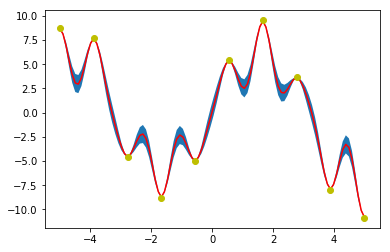

In [110]:
fig = plt.figure()
ax = plt.axes()
ax.fill_between(Xtest, mu - var, mu + var)
ax.plot(Xtest, mu, 'r')
ax.plot(Xtrain, Ytrain, 'oy')

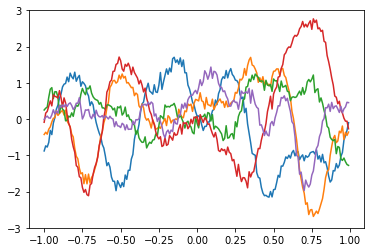

In [131]:
fig = plt.figure()
ax = plt.axes()
ax.set_ylim(-3, 3)

for i in range(5):
    x = np.arange(-1, 1, 0.01)
    X1 = np.resize(x, [x.shape[0]] * 2)
    X2 = np.transpose(X1)
    K = kernel(X1, X2)
    y = np.random.multivariate_normal([0] * K.shape[0], K)

    ax.plot(x, y)